<center>

# Universidad de Costa Rica

## Facultad de Ingeniería
## Escuela de Ingeniería Eléctrica
## Bachillerato en Ingeniería Eléctrica
## IE-0247 Señales y Sistemas I
## II ciclo 2023
#
## Proyecto 2 - Parte 1
#
## José Andrés Guerrero Álvarez – B63162
## Grupo 01

## Profesor: 
## Marvin Coto Jiménez

## 12 de noviembre del 2023

</center>


<div style="text-align: justify;">
<p>

# I. Introducción y contextualización
En el fragmento de código proporcionado, se aborda el procesamiento de señales mediante el diseño y aplicación de un filtro Butterworth para atenuar el ruido en una señal compuesta. La señal original, compuesta por una onda sinusoidal y ruido, se filtra para resaltar la componente sinusoidal, utilizando la transformada de Fourier para analizar las frecuencias presentes antes y después del proceso de filtrado (Cabrera, s. f.).

El presente problema ocurre en el procesamiento de señales, donde la presencia de ruido puede afectar la calidad de la información de interés. La necesidad de filtrar una señal para destacar componentes específicas es común en diversas aplicaciones, como telecomunicaciones, procesamiento de imágenes y análisis de datos. En este caso, se emplea un filtro Butterworth para suavizar la señal y preservar la información relevante (Cabrera, s. f.).
</p>
</div>

<div style="text-align: justify;">
<p>

### Paso 1 : Definir los Parametros de Filtro
</p>
</div>

In [6]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt
T = 5.0         # Período de muestreo
fs = 30.0       # Tasa de muestreo, Hz
cutoff = 2      # Frecuencia de corte deseada del filtro, Hz (ligeramente mayor que la frecuencia real de 1.2 Hz)
nyq = 0.5 * fs  # Frecuencia de Nyquist
order = 2       # Una onda sinusoidal puede aproximarse como cuadrática
n = int(T * fs) # Número total de muestras
t = np.linspace(0.0, T, n, endpoint=False)

<div style="text-align: justify;">
<p>
 Primero se importan las bibliotecas necesarias para realizar operaciones matemáticas y visualizaciones. numpy se utiliza para operaciones numéricas, plotly.graph_objects para gráficos interactivos, matplotlib.pyplot para visualizaciones básicas y scipy.signal para funciones relacionadas con señales y sistemas.
 
 Luego se definen los parámetros para el filtro y la señal. T es el período de muestreo, fs es la tasa de muestreo, cutoff es la frecuencia de corte deseada del filtro, nyq es la frecuencia de Nyquist, order es el orden del filtro y n es el número total de muestras. Se crea un vector de tiempo t utilizando numpy.linspace.
</p>
</div>

<div style="text-align: justify;">
<p>

### Paso 2 : Crear datos de muestra con ruido
</p>
</div>

In [7]:
# sin wave
sig = np.sin(1.2*2*np.pi*t)
# Lets add some noise
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = sig + noise

<div style="text-align: justify;">
<p>
Aquí se genera una onda sinusoidal pura utilizando la función np.sin. La frecuencia de la onda está dada por 1.2, y se multiplica por 2 * np.pi para obtener la forma completa de la onda en un período.

Se crea una señal de ruido compuesta por dos componentes: una componente cosenoidal con una frecuencia de 9 Hz y amplitud 1.5, y una componente senoidal con una frecuencia de 12 Hz y amplitud 0.5.

Ambas señales, la sinusoidal pura y el ruido, se suman para formar la señal compuesta "data". Esta señal compuesta es la que se filtra posteriormente para eliminar el ruido no deseado.
</p>
</div>


<div style="text-align: justify;">
<p>

### Paso 3 : Implementación del filtro usando scipy
</p>
</div>

In [8]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

<div style="text-align: justify;">
<p>
Esta función toma como entrada la señal a filtrar (data), la frecuencia de corte del filtro (cutoff), la tasa de muestreo (fs), y el orden del filtro (order).

La frecuencia de corte se normaliza dividiéndola por la frecuencia de Nyquist (nyq), que es la mitad de la tasa de muestreo.

Luego, utilizando la función butter de scipy.signal, se obtienen los coeficientes del filtro. b y a son los coeficientes del numerador y denominador del sistema de función de transferencia del filtro. La función filtfilt aplica el filtro a la señal de entrada data utilizando los coeficientes b y a. y es la señal filtrada resultante.

Ya por ultimo se retorna la señal filtrada en y.

En resumen, esta función encapsula el proceso de filtrado de una señal con un filtro pasa bajos Butterworth (es un tipo de filtro utilizado en teoría de control y procesamiento de señales, destacado por proporcionar una respuesta de amplitud plana en la banda de paso, lo que significa que atenúa todas las frecuencias en esa banda de manera uniforme), simplificando su aplicación en el código principal (Cabrera, s. f.).
</p>
</div>

<div style="text-align: justify;">
<p>

### Paso 4 : Filtrar y trazar los datos

</p>
</div>

In [9]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

![Gráfico 1.  Representación estatica del gráfico interactivo que contiene la señal con ruido y la señal filtrada.](1.png)

Gráfico 1.  Representación estatica del gráfico interactivo que contiene la señal con ruido y la señal filtrada.


<div style="text-align: justify;">
<p>

Acá se utiliza la función butter_lowpass_filter para filtrar la señal original data con los parámetros especificados (frecuencia de corte, tasa de muestreo y orden del filtro). La señal filtrada se guarda en la variable y.

También, se crea una figura vacía utilizando la clase go.Figure() de Plotly, que se utilizará para agregar las trazas de las señalesy se añade una traza al gráfico para la señal original con ruido (data). Se utiliza una línea suavizada ('spline') para visualizar la forma de la señal.

Se añade otra traza al gráfico para la señal filtrada (y).

Finalmente, se muestra el gráfico interactivo que contiene ambas trazas (señal original y señal filtrada).

</p>
</div>

<div style="text-align: justify;">
<p>

### Paso 5 : Cálcular Transformada de la señal filtrada y sin filtrar y sus respectivos gráficos

</p>
</div>

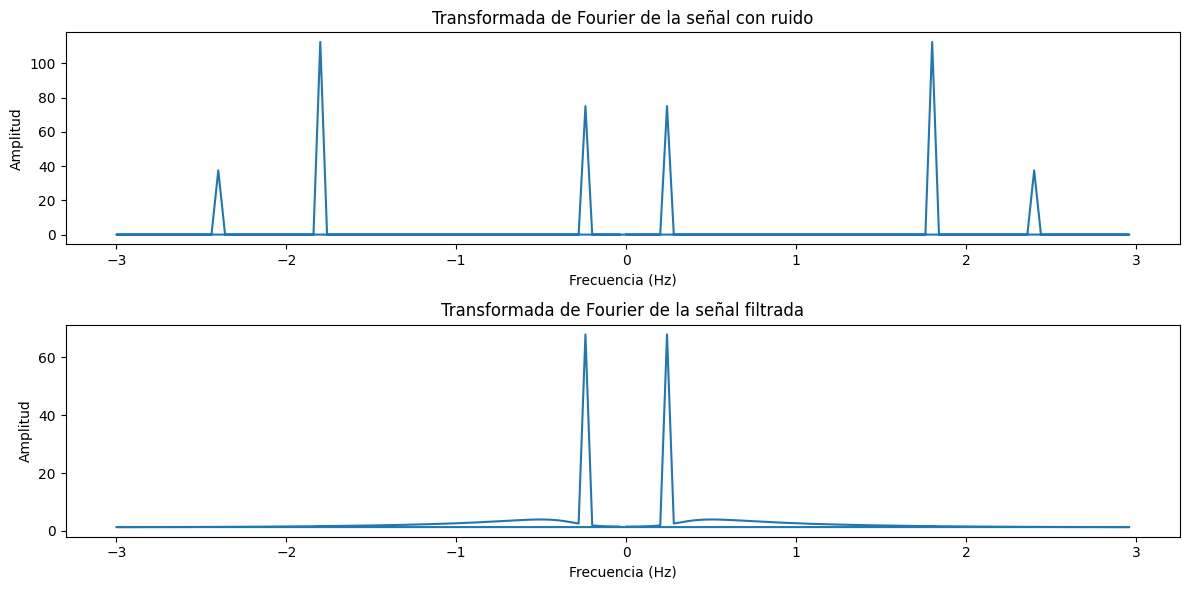

In [11]:
# Calcula la transformada de Fourier de la señal original
fft_original = np.fft.fft(data)
fft_freq_original = np.fft.fftfreq(len(fft_original), T/fs)

# Calcula la transformada de Fourier de la señal filtrada
fft_filtered = np.fft.fft(y)
fft_freq_filtered = np.fft.fftfreq(len(fft_filtered), T/fs)

# Crea un gráfico para la transformada de Fourier de la señal original
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(fft_freq_original, np.abs(fft_original))
plt.title('Transformada de Fourier de la señal con ruido')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')

# Crea un gráfico para la transformada de Fourier de la señal filtrada
plt.subplot(2, 1, 2)
plt.plot(fft_freq_filtered, np.abs(fft_filtered))
plt.title('Transformada de Fourier de la señal filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

![Gráfico 2.  Representación de la transformada de Fourier de dos espectros, el primero es de la señal con ruido, y el segundo de la señal filtrada](2.png)

Gráfico 2.  Representación de la transformada de Fourier de dos espectros, el primero es de la señal con ruido, y el segundo de la señal filtrada.

<div style="text-align: justify;">
<p>

Acá se utiliza la función np.fft.fft para calcular la transformada de Fourier de la señal original (data). Además, se calculan las frecuencias correspondientes utilizando np.fft.fftfreq.

Se crean dos gráficos utilizando matplotlib. El primer gráfico muestra la transformada de Fourier de la señal original, y el segundo gráfico muestra la transformada de Fourier de la señal filtrada. Ambos gráficos tienen etiquetas y títulos para facilitar la interpretación.

Además, se ajusta el diseño de los gráficos para evitar solapamientos y se muestran ambos gráficos.


<div style="text-align: justify;">
<p>

# II. Resultados:

Resumiendo lo que se explicó anteriormente: se aplicó un filtro Butterworth a una señal compuesta, inicialmente formada por una onda sinusoidal y ruido. Los resultados se visualizaron mediante gráficos que muestran la transformada de Fourier de la señal original y la señal filtrada. Estos gráficos proporcionan una representación clara de las frecuencias presentes en ambas señales, permitiendo observar cómo el filtro afecta la distribución espectral.

# III. Conclusiones:

- La aplicación del filtro Butterworth logró atenuar eficazmente el ruido presente en la señal compuesta, preservando la componente sinusoidal de interés.

- La visualización de las transformadas de Fourier antes y después del filtrado facilitó la comprensión de cómo el filtro influye en las frecuencias presentes en la señal.

- La elección de parámetros del filtro, como la frecuencia de corte y el orden, impacta directamente en la eficacia del proceso de filtrado.

- Esta forma de procesamiento de señales resulta útil en situaciones donde es crucial resaltar componentes específicos de una señal, eliminando el ruido no deseado.

# IV. Bibliografía:

Jirafe, N. (2022, 30 marzo). How to filter noise with a low pass filter — Python. Medium. https://medium.com/analytics-vidhya/how-to-filter-noise-with-a-low-pass-filter-python-885223e5e9b7

Cabrera, C., J. (s. f.). Filtros Activos. https://www2.ulpgc.es/hege/almacen/download/29/29861/filtros.pdf


</p>
</div>


</p>
</div>